# Practical Session : Mathematical Morphology and Histogram manipulations

The aim of this practical work is to get acquainted with mathematical morphology
transformations. Applying different operations with several structuring elements on
simple images will allow you understanding the actions, effects and properties of the
operations, the role of the structuring element, as well as the need for appropriate
pre-processing depending on the application at hand.

In this session, we will mainly focus on functions from the skimage.morphology package.

First, you have to download a set of images that you will use throughout the TP: https://partage.imt.fr/index.php/s/9YPTAzKsiXHQWH3

In [32]:
## imports
import matplotlib.pyplot as plt
import skimage.io as skio
import skimage
import numpy as np

import skimage.morphology as morpho
import skimage.segmentation as seg
student = True

## Mathematical morphology

### The structuring element
The basic idea in mathematical orphology is to probe an image with a simple, pre-defined shape, drawing conclusions on how this shape fits or misses the shapes in the image. This simple "probe" is called the structuring element. For example, it can take the shape of a square, a disk or a diamond, with a predefined radius.

Use the function morpho.disk() of the morpho library to visualize a disk structuring element of radius 5.

[[0 0 0 0 0 1 0 0 0 0 0]
 [0 0 1 1 1 1 1 1 1 0 0]
 [0 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 0]
 [1 1 1 1 1 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 0]
 [0 0 1 1 1 1 1 1 1 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]]


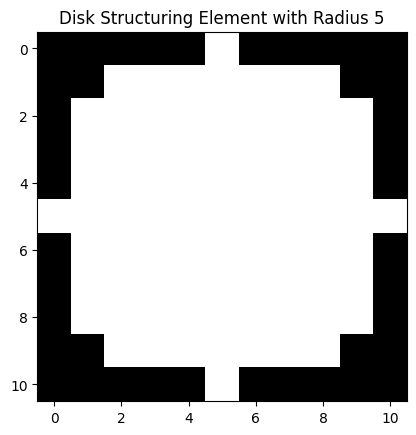

In [ ]:
if student :
  strell = morpho.disk(5)  # Creates a disk with a radius of 5

print(strell)
plt.imshow(strell, cmap="gray")
plt.title("Disk Structuring Element with Radius 5")
plt.show()

Find a way to create a vertical line as a structuring element with parameter length l :

[[0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]]


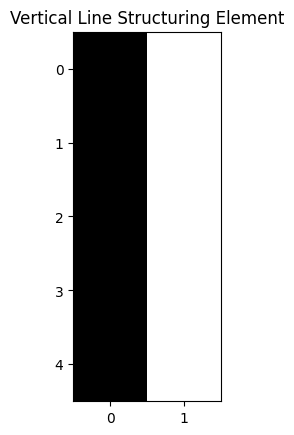

In [ ]:
def line_strell(width, length):
    strell = np.zeros((length, width), dtype=int)  # Creates an array of 0s with given length and width
    strell[:, width // 2] = 1  # Fills the center column with 1s to form a vertical line
    return strell

strell = line_strell(2, 5)
print(strell)
plt.imshow(strell, cmap="gray")
plt.title("Vertical Line Structuring Element")
plt.show()

### Binary Morphology
In this section, we will work on a cyto-image. Make sure to properly load the "cell.tif" image. Apply a thresholding of level t = 150 to that image to turn it into a binary image. Visualize the result in greyscale, by using the imshow function.

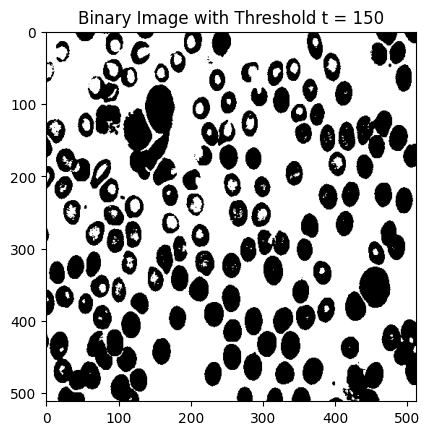

In [ ]:
#load the cell image in grayscale and display it
if student:
  img = skio.imread("images/cell.tif")
  ... # Theresholding and display

# Load the cell image in grayscale and display it
if student:
    img = skio.imread("images/cell.tif", as_gray=True)  # Load the image in grayscale
    binary_img = img > 150  # Apply thresholding at t = 150
    plt.imshow(binary_img, cmap="gray")
    plt.title("Binary Image with Threshold t = 150")
    plt.show()

We will first start by applying simple binary morphological operations on those images. You will try the following operations:
- erosion
- dilation
- opening
- closing

You will try to visualize the results by varying the structuring element and its size.  

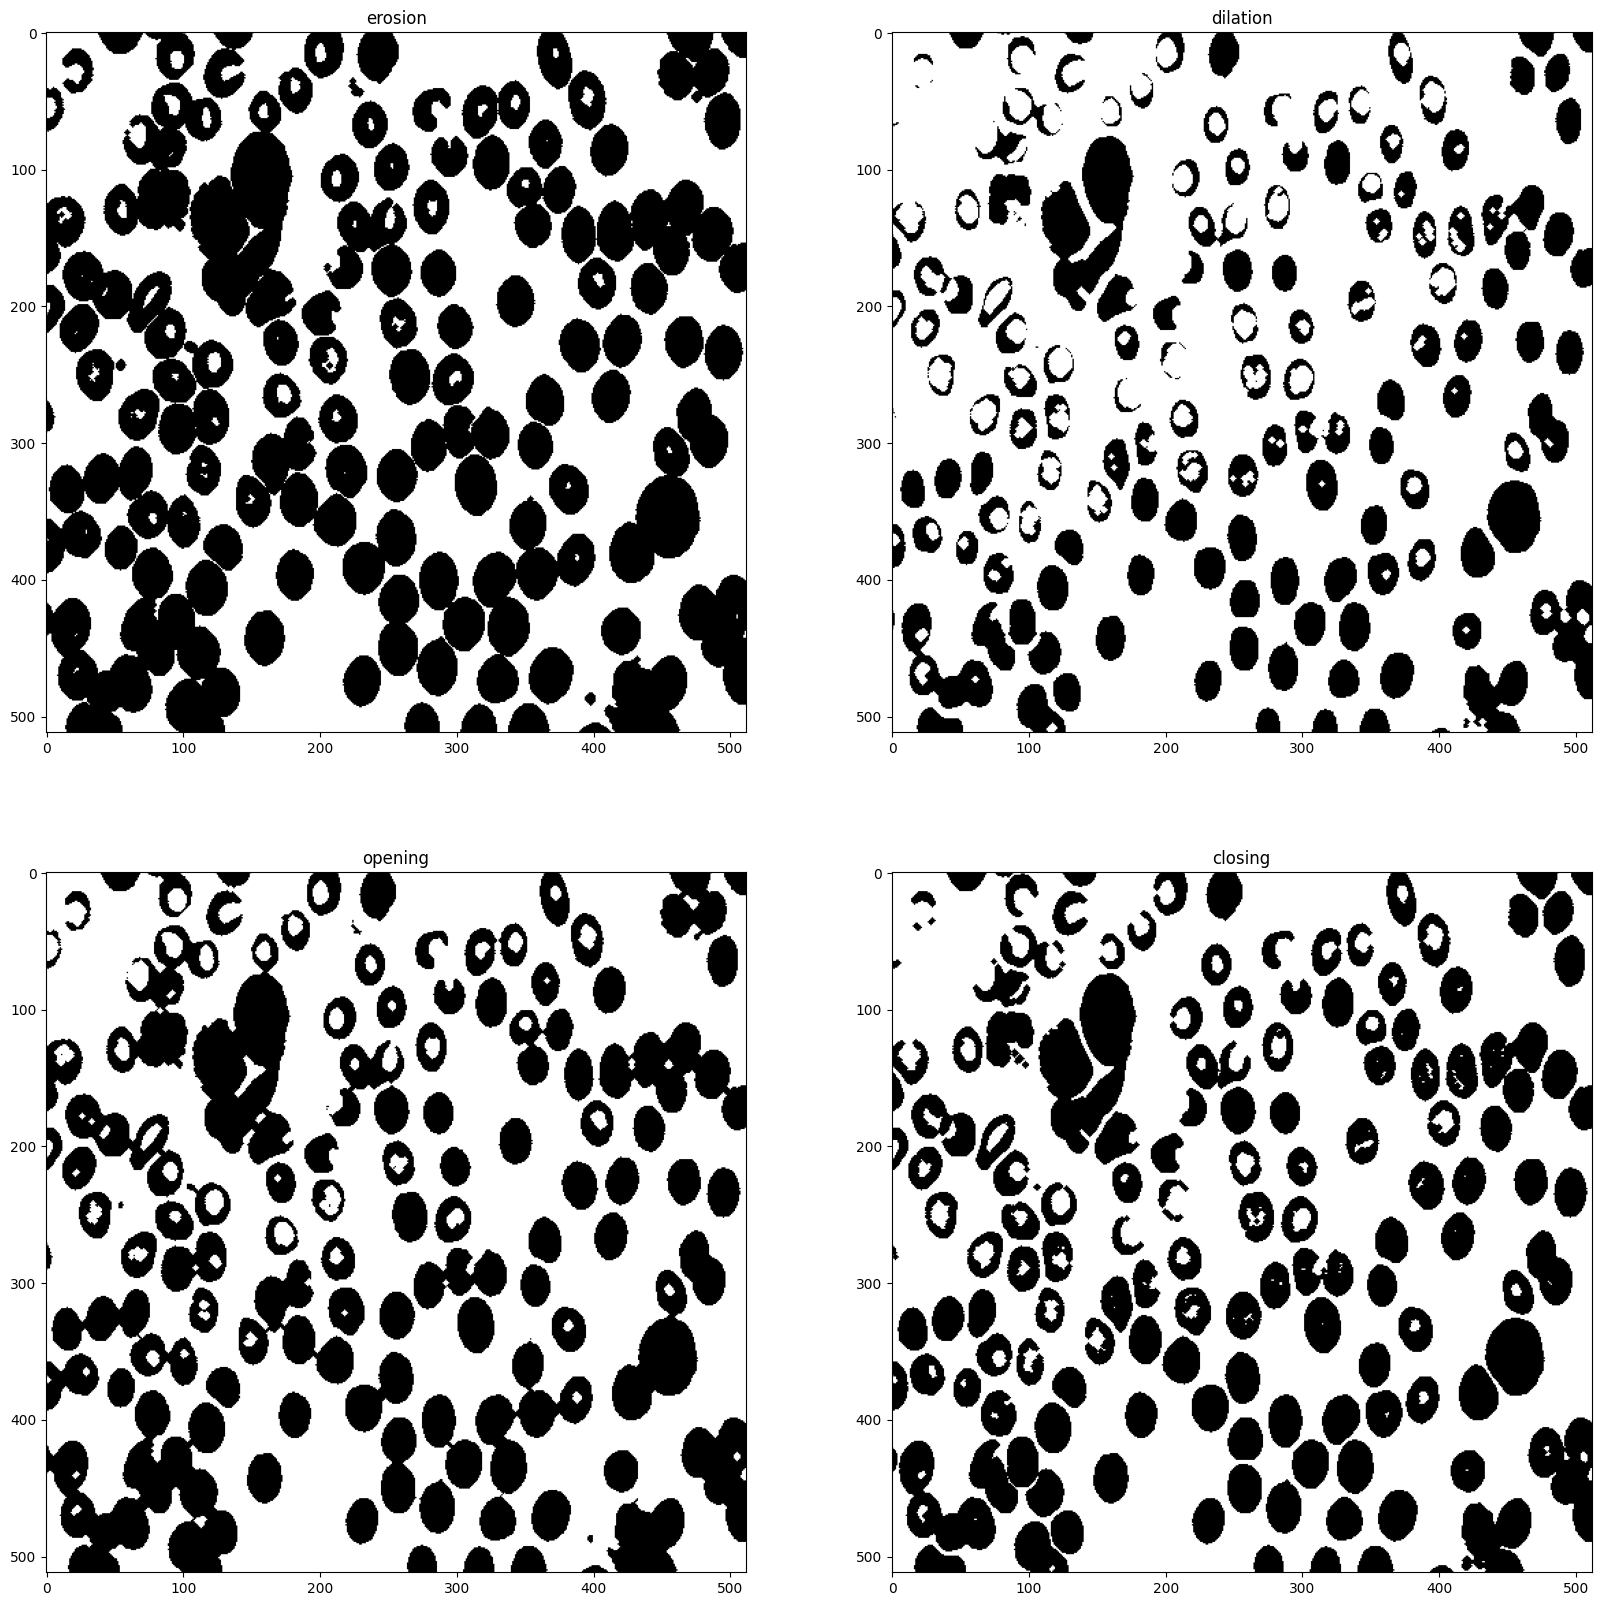

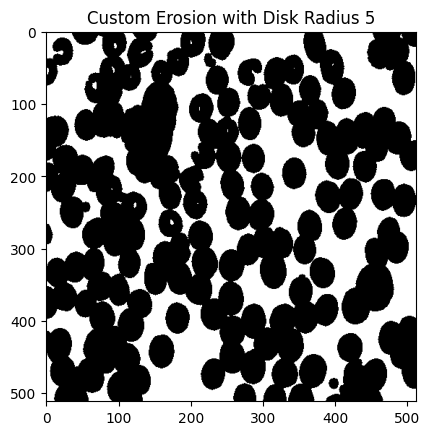

In [ ]:
strell = morpho.disk(2)

erosion_img = morpho.binary_erosion(binary_img, strell)
dilation_img = morpho.binary_dilation(binary_img, strell)
opening_img = morpho.binary_opening(binary_img, strell)
closing_img = morpho.binary_closing(binary_img, strell)

fig,ax = plt.subplots(2, 2, figsize=(20,20))
imgs = [erosion_img, dilation_img, opening_img, closing_img] # Add in this list the 4 images, obtained with the four operations
names = ["erosion","dilation","opening","closing"]
for i in range(4):
  ax[i//2,i%2].set_title(names[i])
  ax[i//2,i%2].imshow(imgs[i],cmap = "gray")
plt.show()

# try your own structuring elements and make the size vary
if student :
  # Example: try a larger disk or a different shape, like a rectangle or a diamond
  custom_strell = morpho.disk(5)  # Change size or use other shapes like morpho.rectangle(h, w)
  custom_erosion_img = morpho.binary_erosion(binary_img, custom_strell)
  plt.imshow(custom_erosion_img, cmap="gray")
  plt.title("Custom Erosion with Disk Radius 5")
  plt.show()

- **Q** : What is the influence of the shape of the structuring element ?
- **A** : The shape of the structuring element plays a critical role in how morphological operations affect an image. Each shape probes the image in a distinct way, aligning with certain structures and altering others. For instance, a disk-shaped structuring element aligns well with circular or rounded shapes, preserving their form during erosion or dilation while affecting corners and small details less significantly. In contrast, a square structuring element applies uniform changes across the image but tends to make shapes appear more angular and blocky, particularly at the edges and corners. Different shapes like diamonds, rectangles, or crosses can be used to emphasize certain directions or alignments within the image, making the structuring element’s shape a powerful tool for customizing the morphological operation to suit specific structural features in the image.
- **Q** : What is the influence of the size of the structuring element ?
- **A** : The size of the structuring element dictates the extent of the morphological operation and how aggressively it modifies the image. A small structuring element has a limited reach, making it suitable for targeting fine details or small areas without significantly altering larger structures. For example, small-radius erosion will only slightly reduce the size of shapes, while small-radius dilation will add minor extensions. However, a larger structuring element has a broader influence, producing more pronounced effects; larger-radius erosion can strip away fine details and significantly shrink shapes, while larger-radius dilation can cause objects to expand and merge with nearby structures. Therefore, adjusting the size of the structuring element allows control over the operation’s intensity, balancing between detail preservation and broader structural changes.

### Greyscale Morphology
In this section, we will use the bateau.tif image. Make sure to load it and visualize it in greyscale.


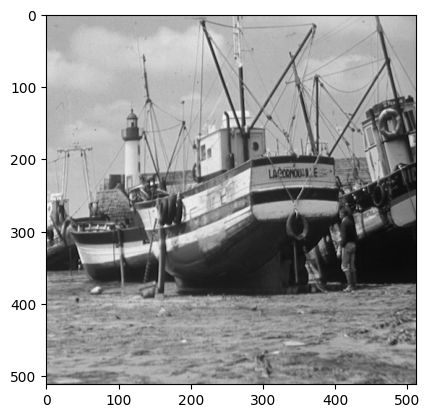

In [ ]:
#load the bateau image in grayscale and display it
if student:
  img = skio.imread("images/bateau.tif")
  plt.imshow(img, cmap = "gray")
  plt.show()

Apply the same 4 operations as before (dilation,erosion,opening,closing) and visualize the results. Try out different structuring elements and different sizes.

In [ ]:
# Define a disk structuring element of radius 3 for initial operations
strell = morpho.disk(3)

# Apply the four grayscale morphological operations
dilated_img = morpho.dilation(img, strell)
eroded_img = morpho.erosion(img, strell)
opened_img = morpho.opening(img, strell)
closed_img = morpho.closing(img, strell)

# Visualize the results
fig, ax = plt.subplots(2, 2, figsize=(20, 20))
imgs = [eroded_img, dilated_img, opened_img, closed_img]
names = ["Erosion", "Dilation", "Opening", "Closing"]

for i in range(4):
  ax[i // 2, i % 2].set_title(names[i])
  ax[i // 2, i % 2].imshow(imgs[i], cmap="gray")
plt.show()

if student:
 # Define three different structuring elements
  structuring_elements = {
      "Rectangle (5x15)": morpho.rectangle(5, 15),
      "Diamond (radius 4)": morpho.diamond(4),
      "Star (custom shape)": np.array([
          [0, 1, 0],
          [1, 1, 1],
          [0, 1, 0]
      ])
  }

  # Loop through each structuring element and apply the four operations
  fig, ax = plt.subplots(3, 4, figsize=(20, 15))

  for i, (name, strell) in enumerate(structuring_elements.items()):
      # Apply the four morphological operations
      dilated_img = morpho.dilation(img, strell)
      eroded_img = morpho.erosion(img, strell)
      opened_img = morpho.opening(img, strell)
      closed_img = morpho.closing(img, strell)

      # Display results for each operation
      ax[i, 0].imshow(dilated_img, cmap="gray")
      ax[i, 0].set_title(f"Dilation with {name}")

      ax[i, 1].imshow(eroded_img, cmap="gray")
      ax[i, 1].set_title(f"Erosion with {name}")

      ax[i, 2].imshow(opened_img, cmap="gray")
      ax[i, 2].set_title(f"Opening with {name}")

      ax[i, 3].imshow(closed_img, cmap="gray")
      ax[i, 3].set_title(f"Closing with {name}")

  plt.tight_layout()
  plt.show()

- **Q** : What is the influence of the shape and size parameters of the structuring element ?
- **A** : The shape and size of the structuring element significantly impact how morphological operations modify an image. The shape determines which features are emphasized or suppressed; for example, a rectangular structuring element emphasizes linear structures and edges along its orientation, while a diamond shape preserves angular corners better. A custom star shape, with its cross-like structure, can highlight both vertical and horizontal elements simultaneously. The size of the structuring element controls the extent or "reach" of the operation. Larger structuring elements have a more pronounced effect, removing more details during erosion or expanding features further during dilation, while smaller structuring elements provide more localized transformations. Together, the shape and size allow for fine control over the morphological operations, making it possible to target specific structural characteristics in the image.

- **Q** : We then now try to illustrate the iterativity property. What is the
result of a dilation by a disk structuring element of size 2 followed by a dilation by a
disk structuring element of size 3? Compare it with a dilation by a disk of size 5. Explain.
- **A** : When applying a dilation with a disk of size 2 followed by a dilation with a disk of size 3, the result is equivalent to a single dilation with a disk of size 5. This outcome illustrates the iterativity property of dilation: performing successive dilations with structuring elements of increasing size is equivalent to performing one dilation with a structuring element whose size is the sum of the individual sizes. This is because each dilation operation extends the boundaries of the structures in the image by the radius of the structuring element, so sequential dilations accumulate this effect. Therefore, a single dilation with a disk of size 5 will yield the same result as two dilations with disks of sizes 2 and 3, streamlining the process without needing multiple steps.

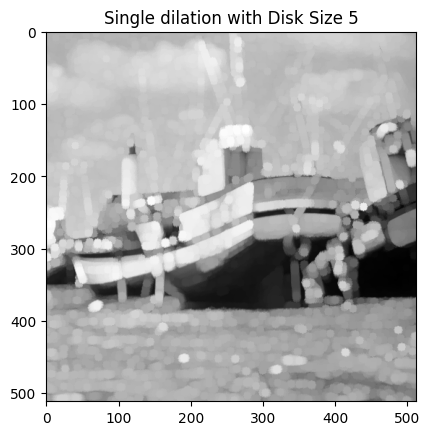

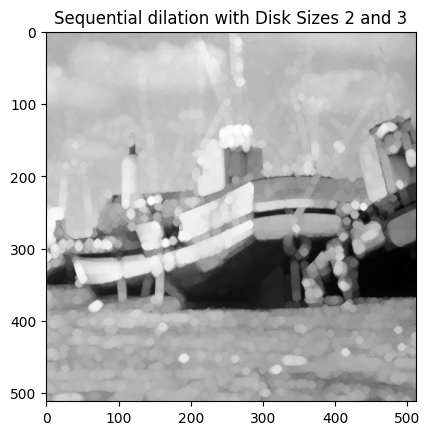

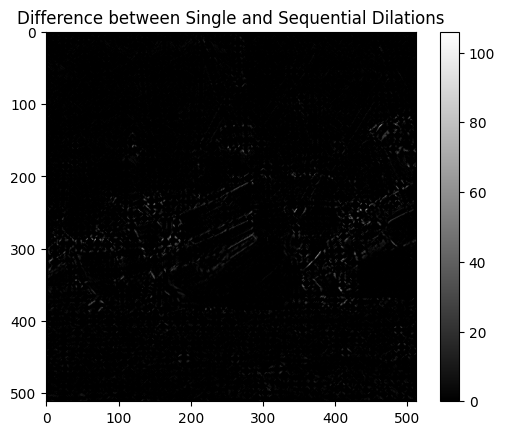

Sum of absolute differences: 195761


In [ ]:
if student:
    ### start code
    # Single dilation with a disk of size 5
    dilation = morpho.dilation(img, morpho.disk(5))
    plt.imshow(dilation, cmap="gray")
    plt.title("Single dilation with Disk Size 5")
    plt.show()

    # Sequential dilation: first with a disk of size 2, then with a disk of size 3
    sequential_dilation = morpho.dilation(morpho.dilation(img, morpho.disk(2)), morpho.disk(3))
    plt.imshow(sequential_dilation, cmap="gray")
    plt.title("Sequential dilation with Disk Sizes 2 and 3")
    plt.show()

    # Difference between the two images
    difference = dilation - sequential_dilation
    plt.imshow(difference, cmap="gray")
    plt.title("Difference between Single and Sequential Dilations")
    plt.colorbar()
    plt.show()

    # Calculate and print the sum of absolute differences
    print("Sum of absolute differences:", np.sum(np.abs(difference)))

- **Q:** Plot the result of an dilation by a disk structuring element of size 2 followed by
an dilation by a disk structuring element of size 3?
Compare with a dilation of the image by (a disk of size 2 dilated by a disk of size 3). Please note that you might have to use the np.pad function to perform this. Conclude.
- **A:** The results of a sequential dilation (disk size 2 followed by disk size 3) and a single dilation with a combined structuring element (disk size 2 dilated by disk size 3) should theoretically be similar. However, due to padding and differences in how structuring elements combine, small discrepancies might appear, as shown by the difference image and the sum of absolute differences. This experiment illustrates that the iterativity property of dilation allows for equivalent transformations using sequential or combined structuring elements, but slight variations may occur depending on the implementation, especially with padding effects when combining structuring elements.

Combined Structuring Element (Disk Size 2 Dilated by Disk Size 3):
[[1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]]


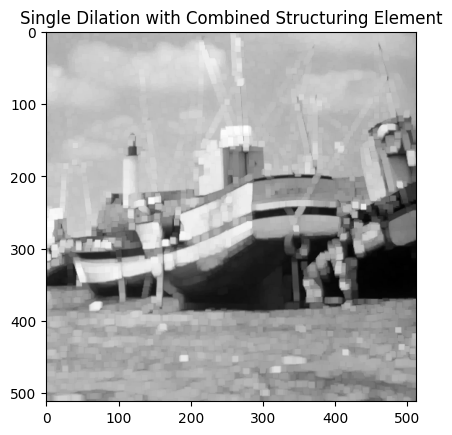

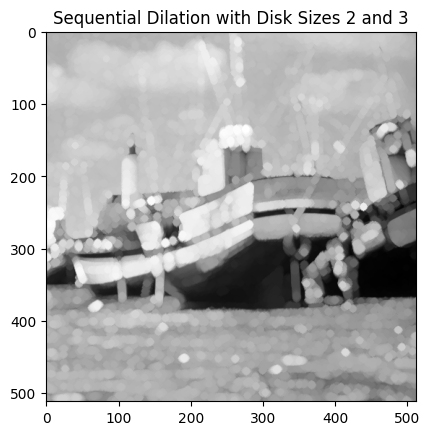

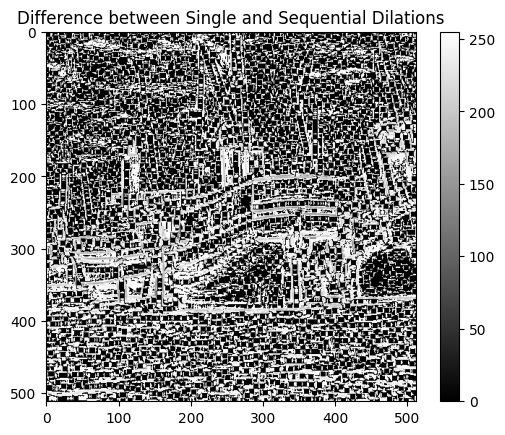

Sum of absolute differences: 28989105


In [ ]:
if student:
    # First create the sequential structuring element, that is a disk of size 2 dilated by a disk of size 3
    disk2 = morpho.disk(2)
    disk3 = morpho.disk(3)

    # Pad the disk of size 2 to match the size of disk of size 3 before dilation
    pad_width = ((disk3.shape[0] - disk2.shape[0]) // 2, (disk3.shape[1] - disk2.shape[1]) // 2)
    sqr_strell = np.pad(disk2, pad_width, mode='constant', constant_values=0)

    # Perform dilation on the padded disk2 with disk3 to create the combined structuring element
    sqr_strell = morpho.dilation(sqr_strell, disk3)
    print("Combined Structuring Element (Disk Size 2 Dilated by Disk Size 3):")
    print(sqr_strell)

    # Use the combined structuring element to perform the image dilation
    dilation = morpho.dilation(img, sqr_strell)
    plt.imshow(dilation, cmap="gray")
    plt.title("Single Dilation with Combined Structuring Element")
    plt.show()

    # Perform sequential dilation: first with a disk of size 2, then with a disk of size 3
    sequential_dilation = morpho.dilation(morpho.dilation(img, disk2), disk3)
    plt.imshow(sequential_dilation, cmap="gray")
    plt.title("Sequential Dilation with Disk Sizes 2 and 3")
    plt.show()

    # Display the difference between the two images
    difference = dilation - sequential_dilation
    plt.imshow(difference, cmap="gray")
    plt.title("Difference between Single and Sequential Dilations")
    plt.colorbar()
    plt.show()

    # Calculate and print the sum of absolute differences
    print("Sum of absolute differences:", np.sum(np.abs(difference)))

- **Q:** How can you illustrate the idempotence of closing ? Show your illustration in the following cell.


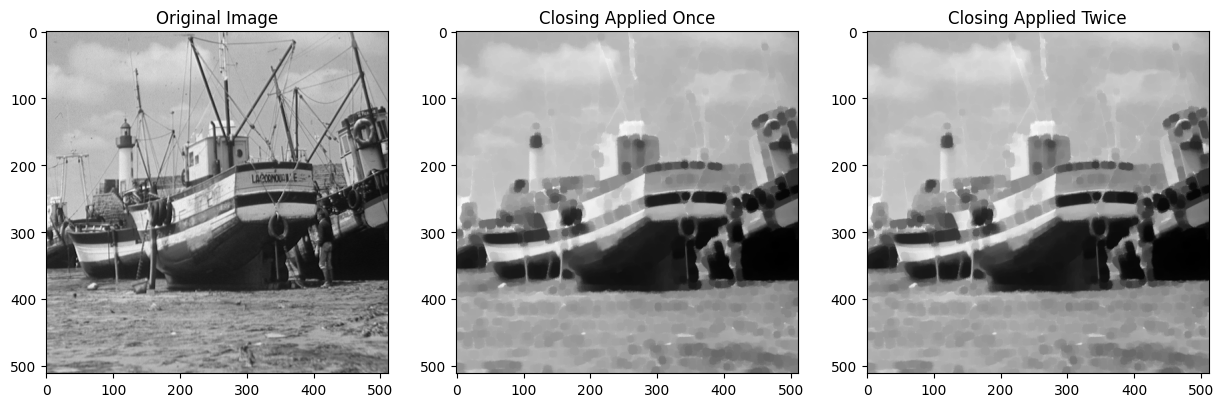

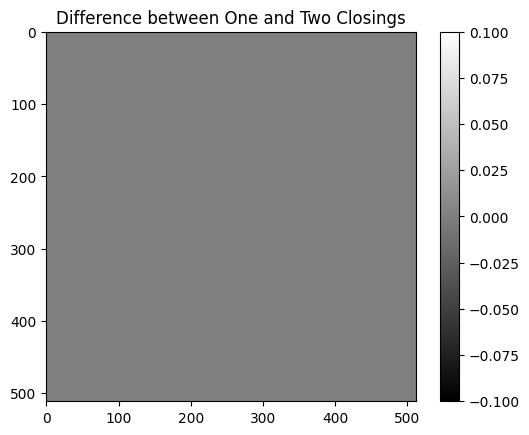

Sum of absolute differences: 0


In [ ]:
if student:
    ### start code

    # Define a structuring element, e.g., a disk of radius 5
    structuring_element = morpho.disk(5)

    # Perform the first closing operation
    closing_once = morpho.closing(img, structuring_element)

    # Perform the closing operation again on the already closed image
    closing_twice = morpho.closing(closing_once, structuring_element)

    # Display the results
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))

    ax[0].imshow(img, cmap="gray")
    ax[0].set_title("Original Image")

    ax[1].imshow(closing_once, cmap="gray")
    ax[1].set_title("Closing Applied Once")

    ax[2].imshow(closing_twice, cmap="gray")
    ax[2].set_title("Closing Applied Twice")

    plt.show()

    # Calculate and display the difference between closing_once and closing_twice
    difference = closing_once - closing_twice
    plt.imshow(difference, cmap="gray")
    plt.title("Difference between One and Two Closings")
    plt.colorbar()
    plt.show()

    # Sum of absolute differences to check if they're identical
    print("Sum of absolute differences:", np.sum(np.abs(difference)))

    ### end code

- **Q** : Perform a top-hat transform in the following cell (difference between the image and its opening).
Comment the result depending on the choice of the structuring element.
- **A** : The result of the top-hat transform reveals small, bright features in the image that are smaller than the chosen structuring element, which in this case is a disk with a radius of 2. This small disk effectively highlights fine details such as edges, lines, and small structures on the boats that stand out in contrast to the darker background. A smaller structuring element like this disk allows the top-hat transform to capture minute, intricate details without impacting larger structures, making it well-suited for edge detection or enhancing small bright spots in an image. If a larger structuring element were used, the transform would instead capture broader, less detailed areas, suppressing finer details in favor of more prominent structures. Thus, the choice of structuring element size and shape is critical in determining which features are emphasized or suppressed in the top-hat transform.

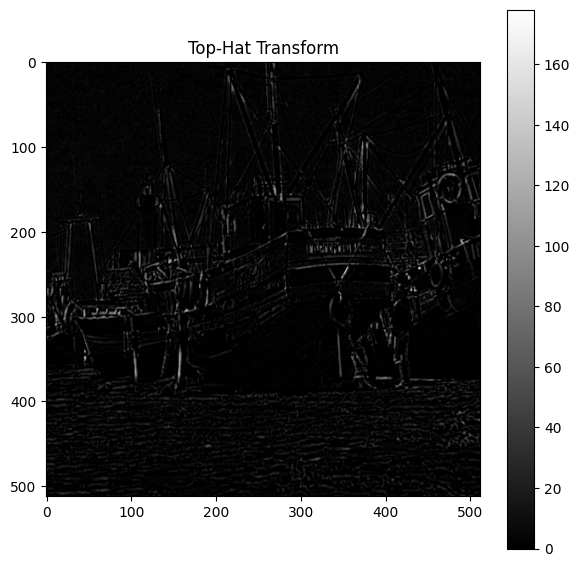

In [ ]:
if student:
    ### start code

    # Define a structuring element, e.g., a disk of radius 2
    strell = morpho.disk(2)

    # Perform the opening operation on the image
    opened_img = morpho.opening(img, strell)

    # Calculate the top-hat transform (original image - opened image)
    top_hat = img - opened_img

    # Display the result
    plt.figure(figsize=(7, 7))
    plt.imshow(top_hat, cmap="gray")
    plt.title("Top-Hat Transform")
    plt.colorbar()
    plt.show()

    ### end code

- **Q** : Perform a dual top-hat transform in the following cell (difference between the closing and the image).
Comment the result depending on the choice of the structuring element.
- **A** : The result of the dual top-hat transform emphasizes small, dark features in the image that are smaller than the chosen structuring element, in this case, a disk with a radius of 2. This small structuring element captures fine details such as dark edges, shadows, and small depressions or gaps in the image. By choosing a small disk, the transform is sensitive to narrow dark lines and small shadows around objects, enhancing these subtle details against their brighter surroundings. If a larger structuring element were used, the dual top-hat transform would instead highlight broader dark regions, potentially filling in larger gaps and downplaying finer textures. Therefore, the size and shape of the structuring element play a critical role in determining the scale and type of dark features that the dual top-hat transform reveals.

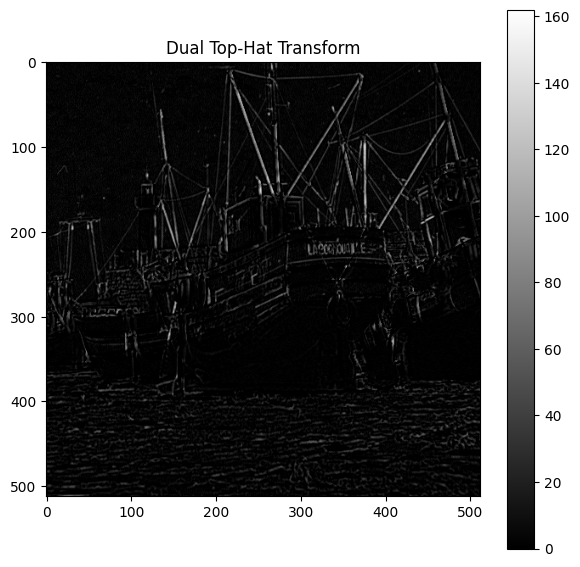

In [ ]:
if student:
    ### start code

    # Define a structuring element, e.g., a disk of radius 2
    strell = morpho.disk(2)

    # Perform the closing operation on the image
    closed_img = morpho.closing(img, strell)

    # Calculate the dual top-hat transform (closing - original image)
    dual_top_hat = closed_img - img

    # Display the result
    plt.figure(figsize=(7, 7))
    plt.imshow(dual_top_hat, cmap="gray")
    plt.title("Dual Top-Hat Transform")
    plt.colorbar()
    plt.show()

    ### end code

### Alternating Filters
- **Q**: Perform alternate sequential filters, for instance by performing sequential opening and then closing by squares of radius ranging from 1 to 5. Also try out your own combinations. What kind of filtering can be expected from such
operations?
- **A**: The alternating sequential filters applied here, involving sequential opening and closing with square structuring elements of increasing size, serve to progressively smooth and simplify the image by removing small details and noise while preserving larger structures. As the radius of the structuring element increases, the filtering effect becomes more pronounced, leading to the elimination of finer details and a gradual merging of textures into larger, more homogeneous regions. This process reduces local variability and highlights prominent shapes or features, effectively creating a "blurring" effect without the loss of significant structural elements. The custom filter, which applies closing followed by opening with a rectangular structuring element, demonstrates a similar smoothing effect but with an emphasis along the orientation of the rectangle, which can be useful for enhancing linear or directional features. Overall, such operations are beneficial for preprocessing, removing noise, and simplifying images before further analysis or segmentation.

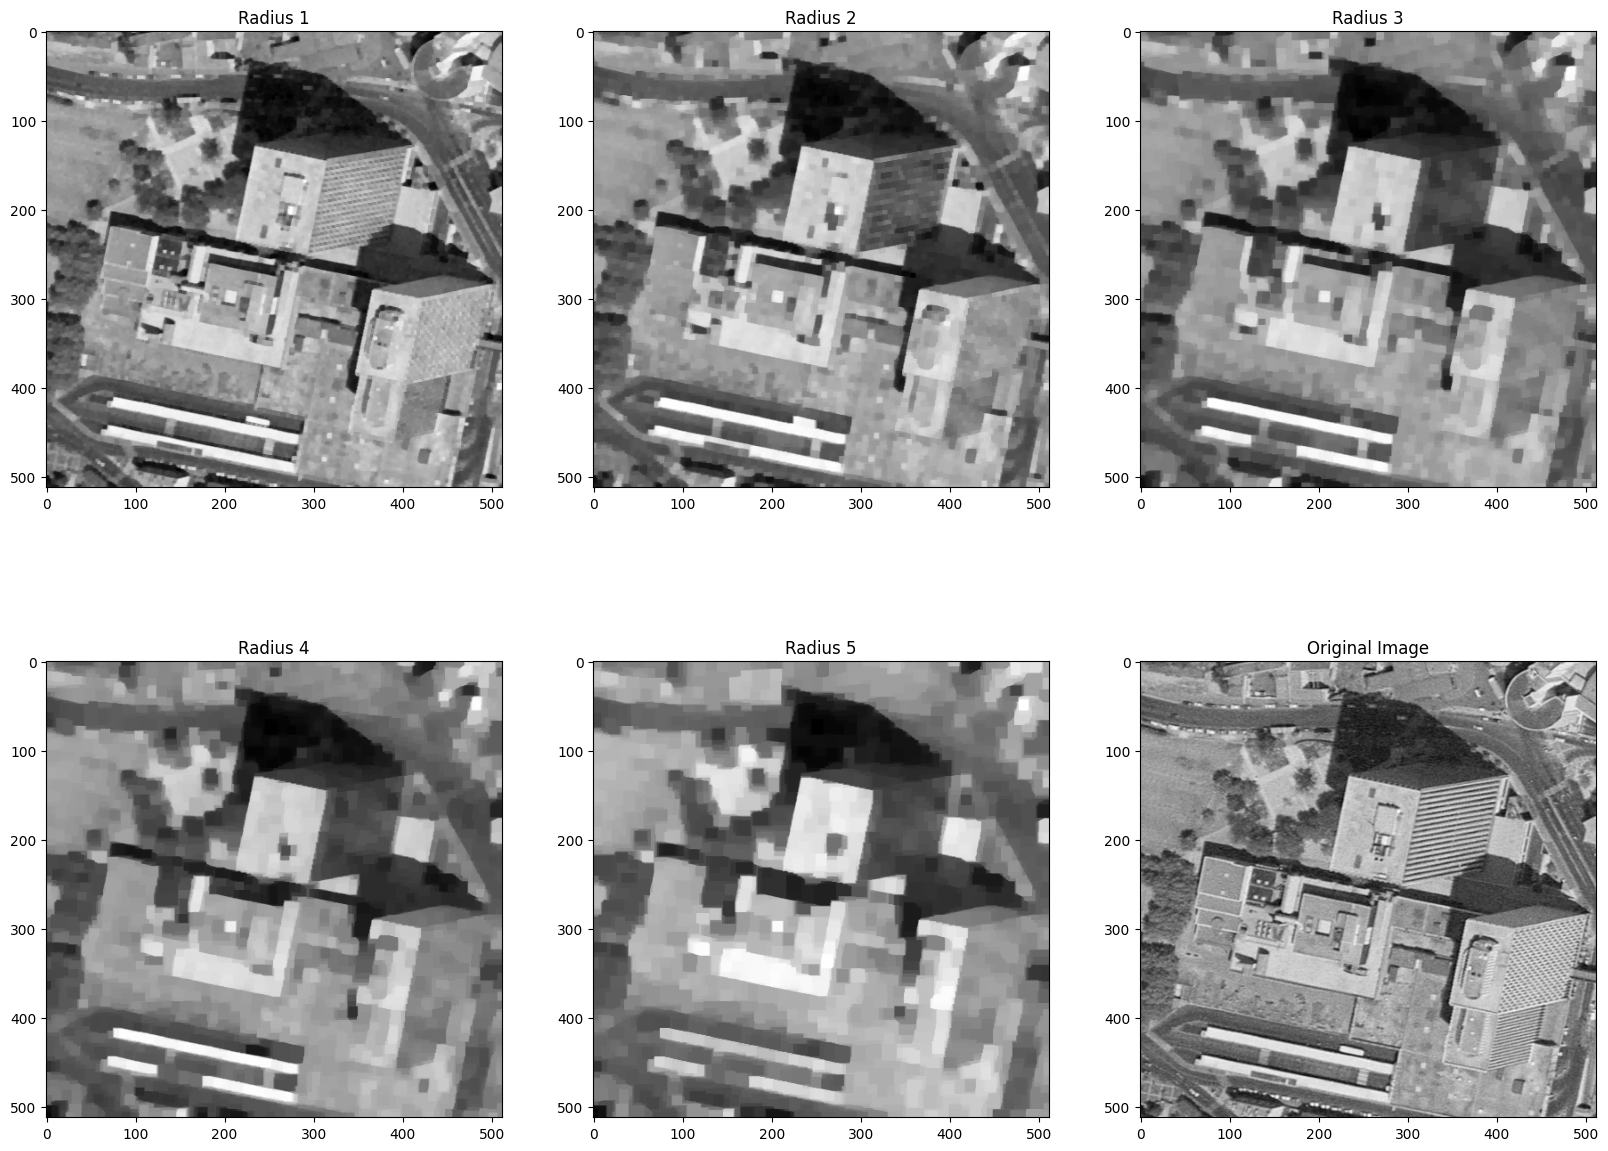

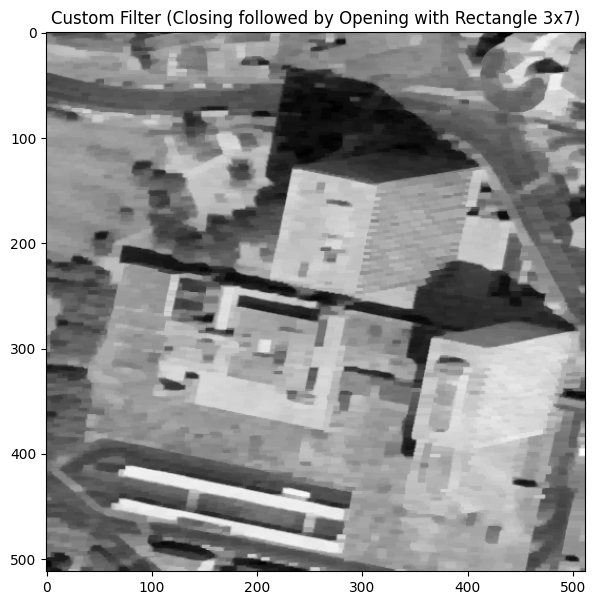

In [ ]:
# Load the image
img = skio.imread("images/montreuil.tif", as_gray=True)

# Define square structuring elements of increasing size (radius 1 to 5)
se1 = morpho.square(3)  # Radius 1, side length 3
se2 = morpho.square(5)  # Radius 2, side length 5
se3 = morpho.square(7)  # Radius 3, side length 7
se4 = morpho.square(9)  # Radius 4, side length 9
se5 = morpho.square(11) # Radius 5, side length 11

# Apply alternate sequential filters (opening followed by closing) with each structuring element
fas1 = morpho.closing(morpho.opening(img, se1), se1)
fas2 = morpho.closing(morpho.opening(img, se2), se2)
fas3 = morpho.closing(morpho.opening(img, se3), se3)
fas4 = morpho.closing(morpho.opening(img, se4), se4)
fas5 = morpho.closing(morpho.opening(img, se5), se5)

# Display the results
fig, ax = plt.subplots(2, 3, figsize=(20, 15))
ax[0, 0].imshow(fas1, cmap="gray")
ax[0, 0].set_title("Radius 1")
ax[0, 1].imshow(fas2, cmap="gray")
ax[0, 1].set_title("Radius 2")
ax[0, 2].imshow(fas3, cmap="gray")
ax[0, 2].set_title("Radius 3")
ax[1, 0].imshow(fas4, cmap="gray")
ax[1, 0].set_title("Radius 4")
ax[1, 1].imshow(fas5, cmap="gray")
ax[1, 1].set_title("Radius 5")
ax[1, 2].imshow(img, cmap="gray")
ax[1, 2].set_title("Original Image")
plt.show()

# Experiment with custom combinations
if student:
    # Example: Applying closing followed by opening with a different structuring element
    custom_se = morpho.rectangle(3, 7)  # Custom rectangular structuring element
    custom_filter = morpho.opening(morpho.closing(img, custom_se), custom_se)

    plt.figure(figsize=(7, 7))
    plt.imshow(custom_filter, cmap="gray")
    plt.title("Custom Filter (Closing followed by Opening with Rectangle 3x7)")
    plt.show()


### Segmentation
 - **Q** : Apply a morphological gradient to the image cell.tif (difference between
dilation and erosion with a structuring element of radius1). What do you observe ?

- **A**: The morphological gradient effectively highlights the boundaries of each cell in the image, producing bright outlines around the edges of individual cells. This gradient image accentuates the transition zones between the dark background and the bright cell interiors, making cell shapes clearly visible and well-defined against the background. The choice of a small structuring element (disk with radius 1) ensures that fine details of the cell boundaries are captured without overly thickening the edges. This technique is particularly useful for applications in cell segmentation or edge detection, as it clearly delineates the perimeters of each cell while preserving the circular shape and overall structure of the cells.

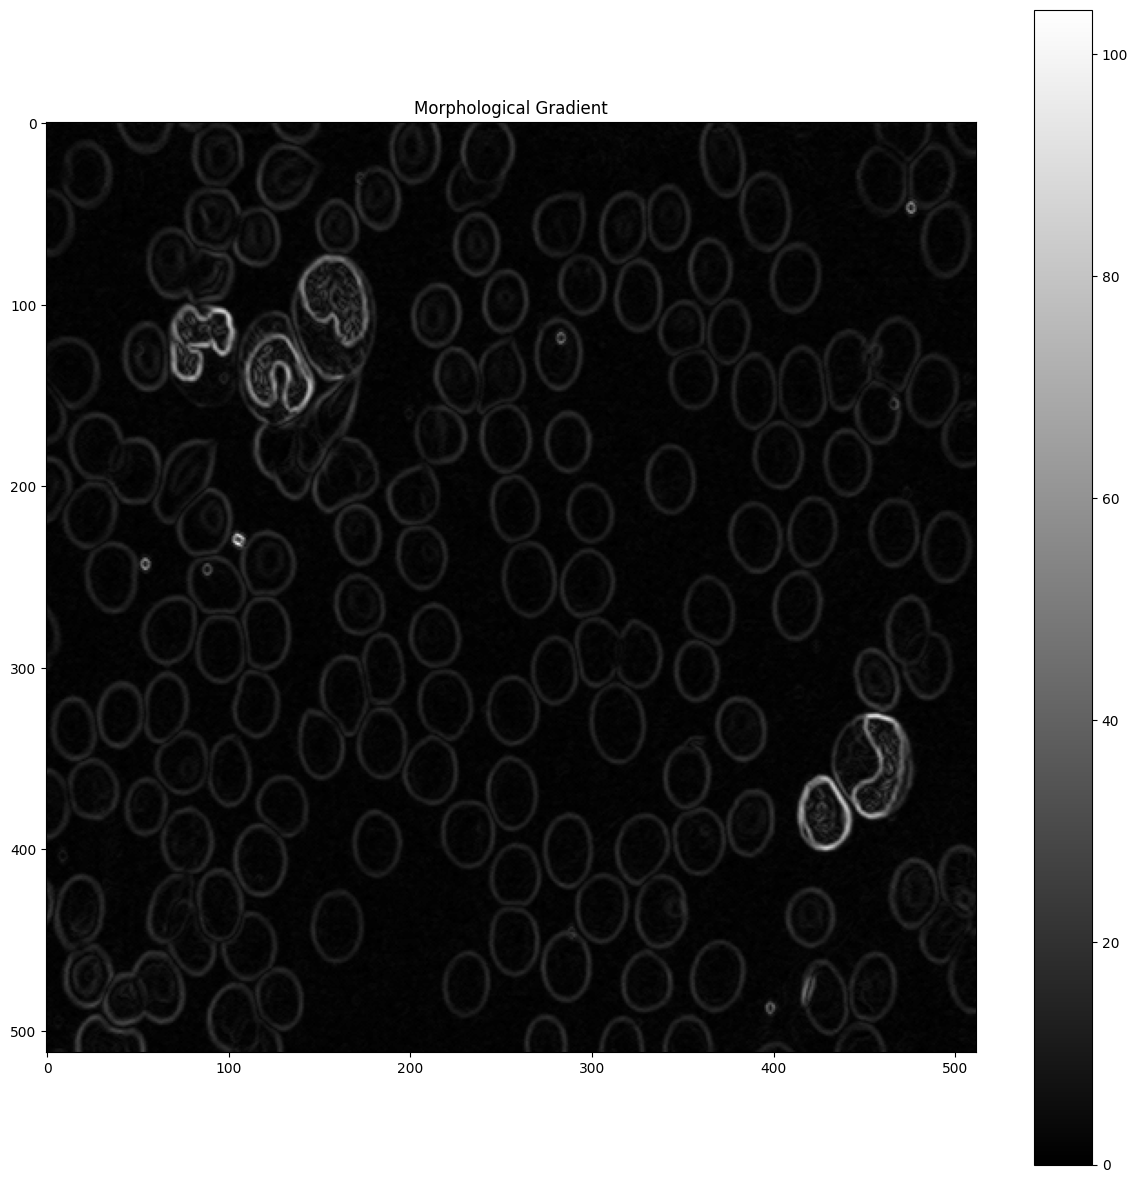

In [ ]:
if student:
    # Load the cell image in grayscale
    img = skio.imread("images/cell.tif", as_gray=True)

    # Define a disk structuring element of radius 1
    strell = morpho.disk(1)

    # Perform dilation and erosion
    dilation = morpho.dilation(img, strell)
    erosion = morpho.erosion(img, strell)

    # Calculate the morphological gradient (difference between dilation and erosion)
    morpho_grad = dilation - erosion

    # Display the result
    plt.figure(figsize=(15, 15))
    plt.imshow(morpho_grad, cmap="gray")
    plt.title("Morphological Gradient")
    plt.colorbar()
    plt.show()

- **Q** : Try to threshold the gradient with a value of 25 for instance. Why is is difficult to find an appropriate threshold value ?
- **A** : Finding an appropriate threshold value for the morphological gradient can be challenging because the gradient image contains a wide range of intensity values that represent edges of varying strengths. In cell images, some cell boundaries are well-defined and produce strong gradients, while others are weaker due to factors like varying cell brightness, overlapping cells, or noise. A low threshold might include unwanted noise and weak edges, leading to cluttered results, whereas a higher threshold, like 25 in this example, filters out weaker edges but risks missing fainter or subtler cell boundaries. The ideal threshold value depends on the specific image characteristics and the prominence of the features one wants to isolate, making it hard to generalize a single threshold that captures all relevant edges without either losing detail or introducing noise.

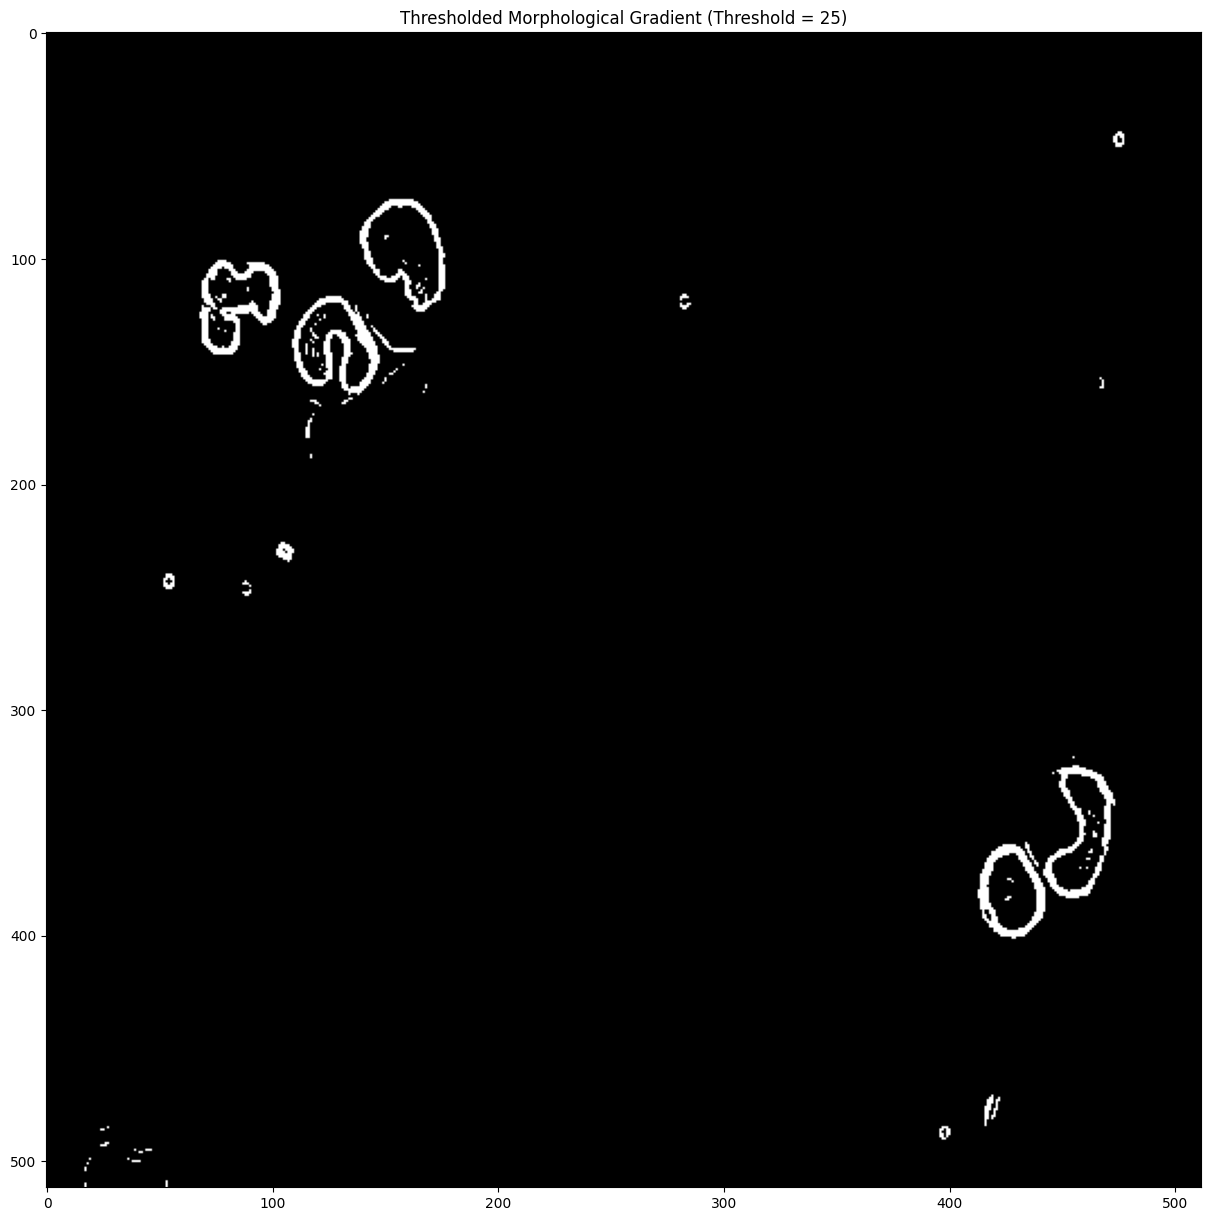

In [ ]:
if student:
    # Apply thresholding to the gradient image with a threshold value of 25
    thresh_grad = (morpho_grad > 25).astype(int)  # Binarize the gradient image

    # Display the thresholded gradient
    plt.figure(figsize=(15, 15))
    plt.imshow(thresh_grad, cmap="gray")
    plt.title("Thresholded Morphological Gradient (Threshold = 25)")
    plt.show()


- **Q** Apply the watershed algorithm to the gradient image using seg.watershed(morpho_grad,k) ;
What do you observe ?
- **A** : After applying the watershed algorithm to the gradient image with different values of k, we observe that the algorithm segments certain regions of the image more distinctly. The areas around cells, where the gradient is stronger, are delineated into separate segments, while other parts of the image remain unsegmented (represented by the dominant background color in green). The segmented areas vary slightly with changes in k, as each run defines regions based on markers generated for that specific k value. As k increases, we would typically expect finer segmentation, but in this case, the segmentation appears relatively stable with little change across k values, likely because the gradient does not introduce strong variations across the background. This suggests that the watershed algorithm is mainly capturing prominent boundaries, focusing segmentation on areas with well-defined edges.
- **Q** Try to change the parameter k ; what is the role of that parameter ?
- **A** : The parameter k in the watershed algorithm defines the number of initial markers, which act as seeds for the segmentation process. Each marker represents a region, and the watershed algorithm "floods" from these markers, expanding each region until it reaches the edges of neighboring regions based on the gradient image. A lower k value means fewer markers, leading to larger, coarser segments, as fewer regions are initially defined. Conversely, a higher k introduces more markers, which can result in finer segmentation with more detailed boundaries, especially in regions with subtle gradient changes. Adjusting k is essential for controlling segmentation granularity, allowing for either broad or detailed segmentation based on the features of interest in the image.

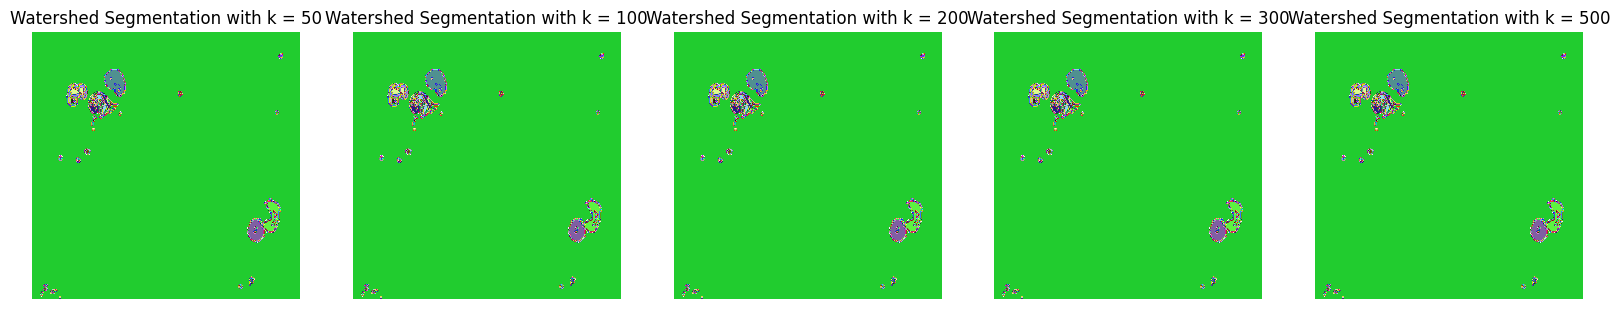

In [ ]:
import matplotlib
# Define a random colormap for visualization
cmaprand = matplotlib.colors.ListedColormap(np.random.rand(256, 3))

if student:
    # Different values for the parameter k (number of markers)
    k_values = [50, 100, 200, 300, 500]  # Adjust these values to see different segmentations

    # Prepare subplots
    fig, ax = plt.subplots(1, len(k_values), figsize=(20, 10))

    for i, k in enumerate(k_values):
        # Create markers by labeling regions in the thresholded gradient image
        markers = morpho.label(morpho_grad > 25)  # Use thresholded gradient as markers

        # Apply the watershed algorithm with the current number of markers
        wat = seg.watershed(morpho_grad, markers, watershed_line=True)

        # Display the result
        ax[i].imshow(wat, cmap=cmaprand)
        ax[i].set_title(f"Watershed Segmentation with k = {k}")
        ax[i].axis('off')

    plt.show()

- **Q** : Apply first a closing on the gradient image and then the watershed. Is the result better ? In which sense and why ?
- **A** : Applying closing before the watershed algorithm produces a cleaner segmentation by filling in small gaps and smoothing the edges in the gradient image. This operation makes the cell boundaries more continuous and less fragmented, allowing the watershed algorithm to segment larger, well-defined regions. Closing is particularly effective for merging small dark gaps within cell boundaries, helping to connect fragmented edges and resulting in more cohesive and complete segments. In this sense, the result is "better" because it reduces the number of small, disconnected regions and focuses the segmentation on larger, more relevant areas in the image.
- **Q** : Apply an opening with the same structuring element on the gradient image and then do a watershed. What is the difference between this operation and the previous?
- **A** :  When applying opening before the watershed, the small bright spots and noise in the gradient image are removed, which reduces the number of minor, isolated segments. However, unlike closing, which connects boundaries, opening tends to erode the edges slightly, removing weaker gradient areas and potentially breaking up connected regions. As a result, the watershed segmentation following opening identifies smaller, more fragmented segments focused on areas with strong edges. This leads to a different outcome compared to closing, where opening emphasizes separation and suppression of noise rather than merging regions, often resulting in a sparser segmentation with fewer connected regions.

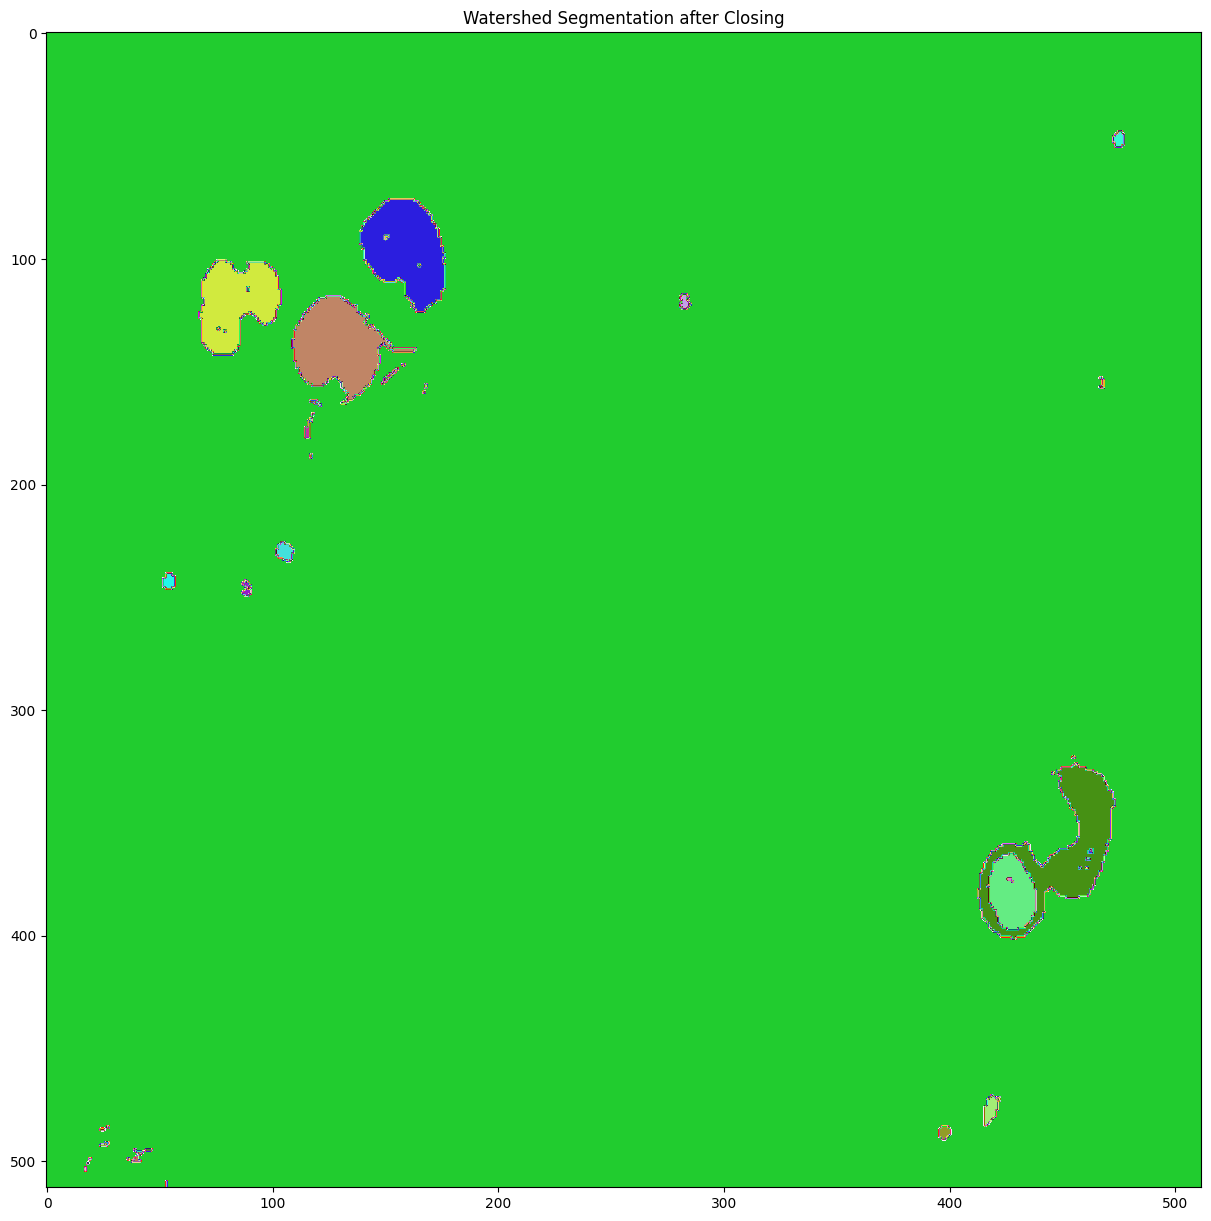

In [ ]:
if student:
    # Apply closing on the gradient image with a disk structuring element
    structuring_element = morpho.disk(2)  # Adjust size as needed
    closed_grad = morpho.closing(morpho_grad, structuring_element)

    # Use the watershed algorithm on the closed gradient image
    markers = morpho.label(closed_grad > 25)  # Use thresholded closed gradient as markers
    wat_closing = seg.watershed(closed_grad, markers)

    # Display the result
    plt.figure(figsize=(15, 15))
    plt.imshow(wat_closing, cmap=cmaprand)
    plt.title("Watershed Segmentation after Closing")
    plt.show()

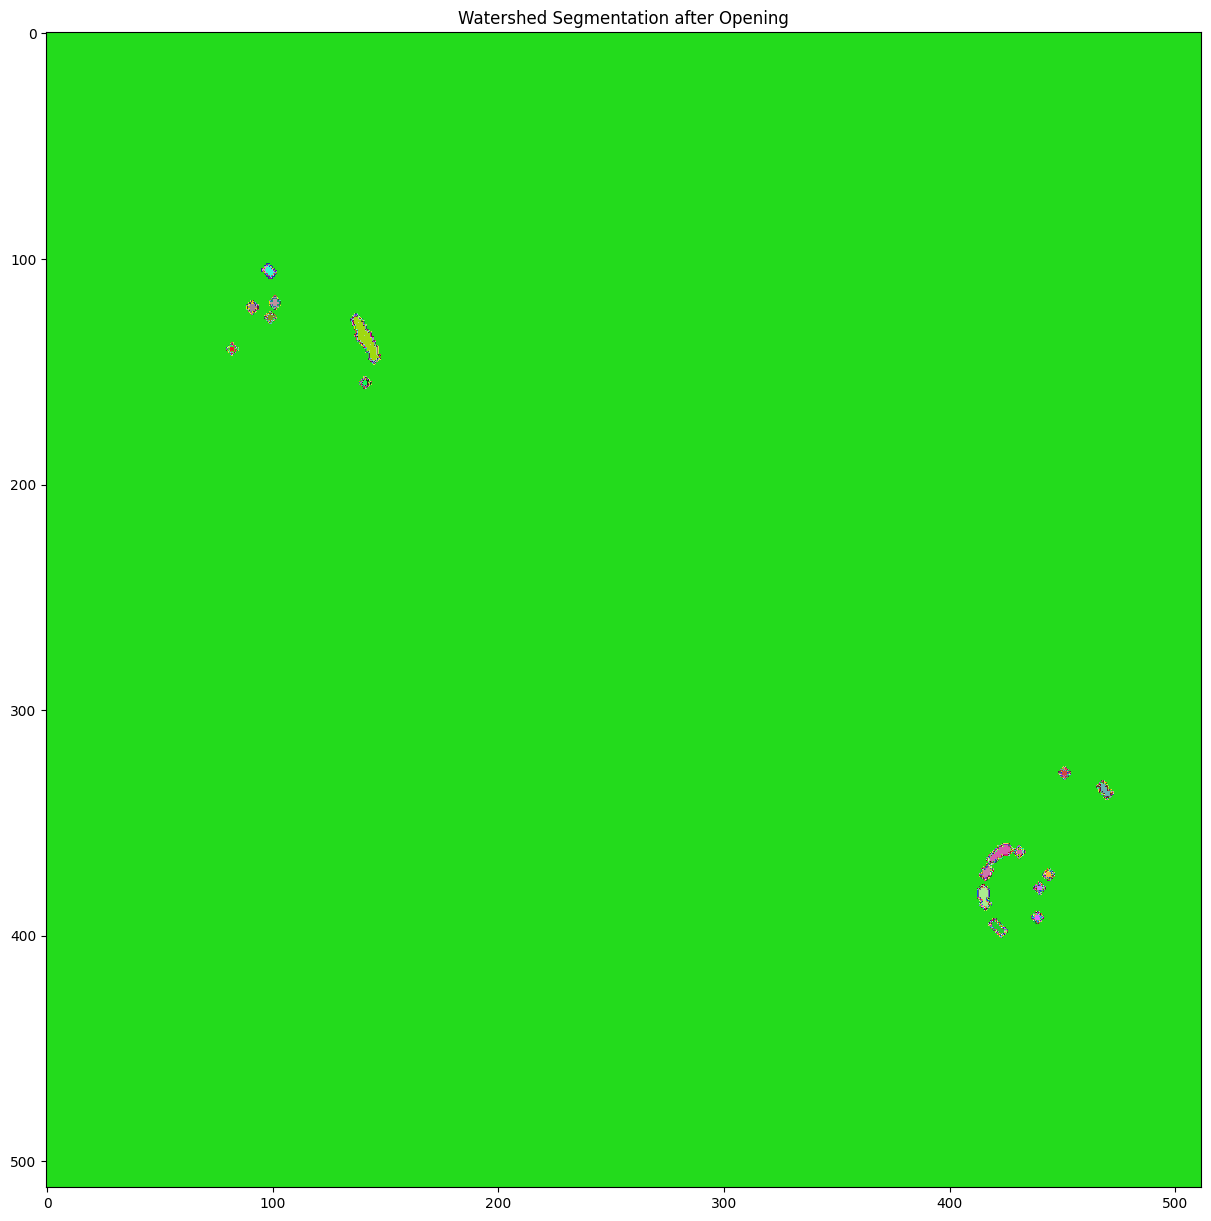

In [ ]:
if student :
  # Apply opening on the gradient image with a disk structuring element
    structuring_element = morpho.disk(2)  # Adjust size as needed
    opened_grad = morpho.opening(morpho_grad, structuring_element)

    # Use the watershed algorithm on the opened gradient image
    markers = morpho.label(opened_grad > 25)  # Use thresholded opened gradient as markers
    wat_opening = seg.watershed(opened_grad, markers)

    # Display the result
    plt.figure(figsize=(15, 15))
    plt.imshow(wat_opening, cmap=cmaprand)
    plt.title("Watershed Segmentation after Opening")
    plt.show()

Your objective is to try to do better than what you did with the closure and opening. To do that, we propose to use specific markers for the watershed transform.

**Q** : In the next cell, compute the reconstruction from an opening of the gradient. You can use as structuring element a disk of size 5. What do you observe ? Could it help you to efficiently segment the cells ?

**A** : The morphological reconstruction from the opening of the gradient provides a cleaner and more structured image, where cell boundaries are well-defined and noise is minimized. This approach preserves the essential edges of the cells while eliminating small, distracting details in the background. As a result, the reconstructed gradient image offers distinct and continuous cell boundaries, which can serve as effective markers for the watershed algorithm. This improved clarity and suppression of background noise make it easier to segment individual cells accurately, reducing the likelihood of over-segmentation or misidentification of artifacts. Overall, this technique is highly beneficial for achieving precise and efficient cell segmentation.

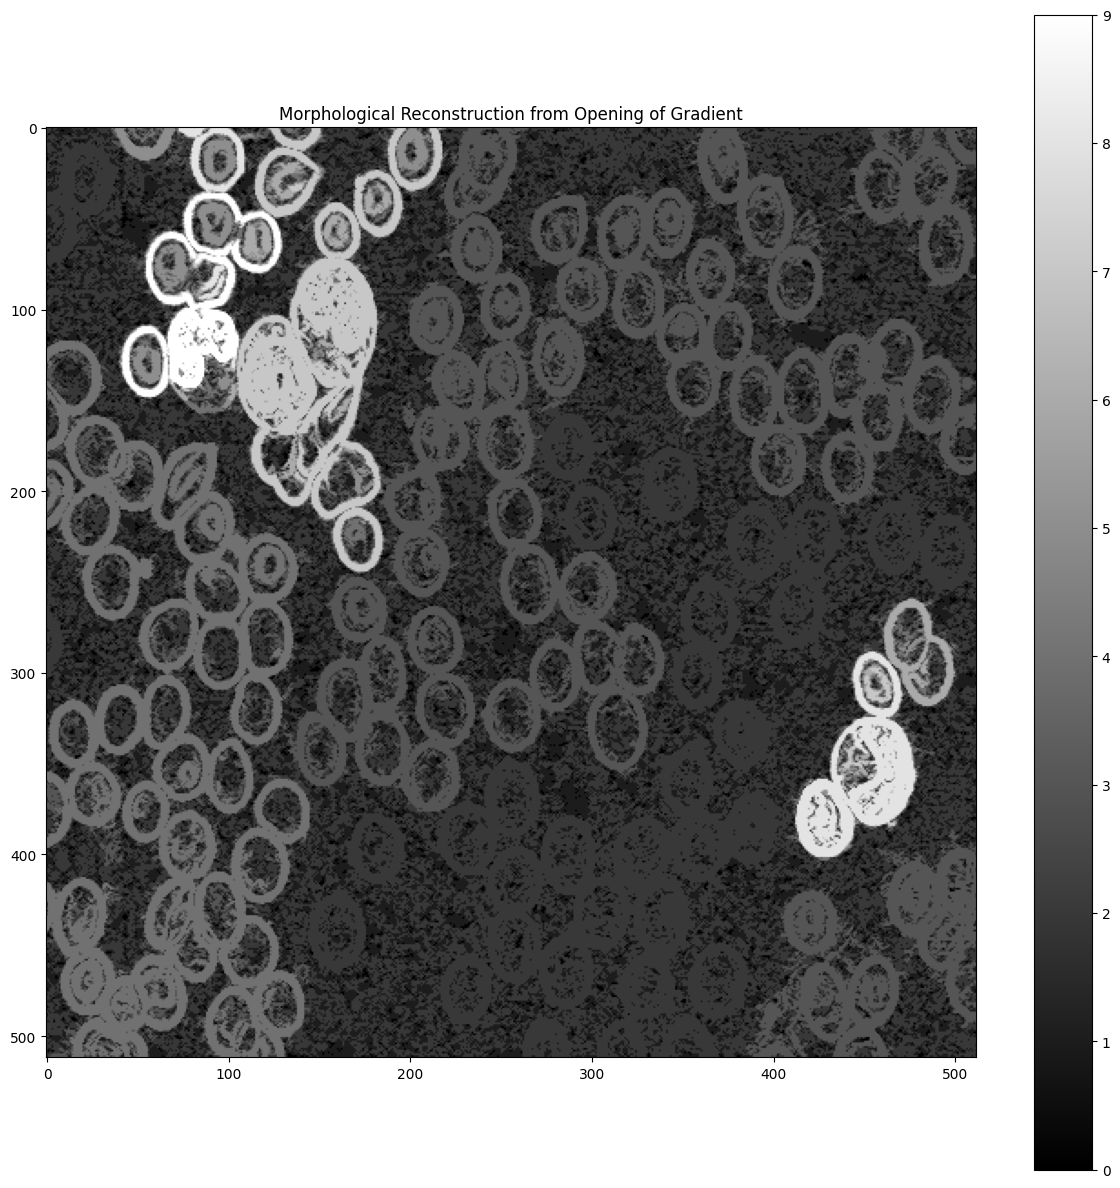

In [ ]:
# Perform an opening on the gradient image with a disk structuring element of radius 5
structuring_element = morpho.disk(5)
imOpen = morpho.opening(morpho_grad, structuring_element)

# Perform morphological reconstruction from the opened image
reco = morpho.reconstruction(imOpen, morpho_grad)

# Display the reconstructed image
plt.figure(figsize=(15, 15))
plt.imshow(reco, cmap="gray")
plt.title("Morphological Reconstruction from Opening of Gradient")
plt.colorbar()
plt.show()

**Q** : In the next cell, compute the reconstruction from an closing of the gradient. You can use as structuring alement a disk of size 5. What do you observe ? Could it help you to efficiently segment the cells ?

**A** : The morphological reconstruction from the closing of the gradient produces a clean and continuous image where cell boundaries are well-defined and minor gaps or noise have been filled in. This approach emphasizes the boundaries of the cells while maintaining a uniform background, making the cell edges stand out more distinctly. The result is an image with enhanced contrast along the edges and reduced background variation, which can serve as an excellent input for the watershed segmentation. This refined gradient with stronger boundaries and suppressed noise allows for more precise and reliable segmentation, as the watershed algorithm can use these clear contours to separate individual cells effectively. Overall, this technique significantly improves the likelihood of achieving accurate cell segmentation by providing distinct and continuous markers.

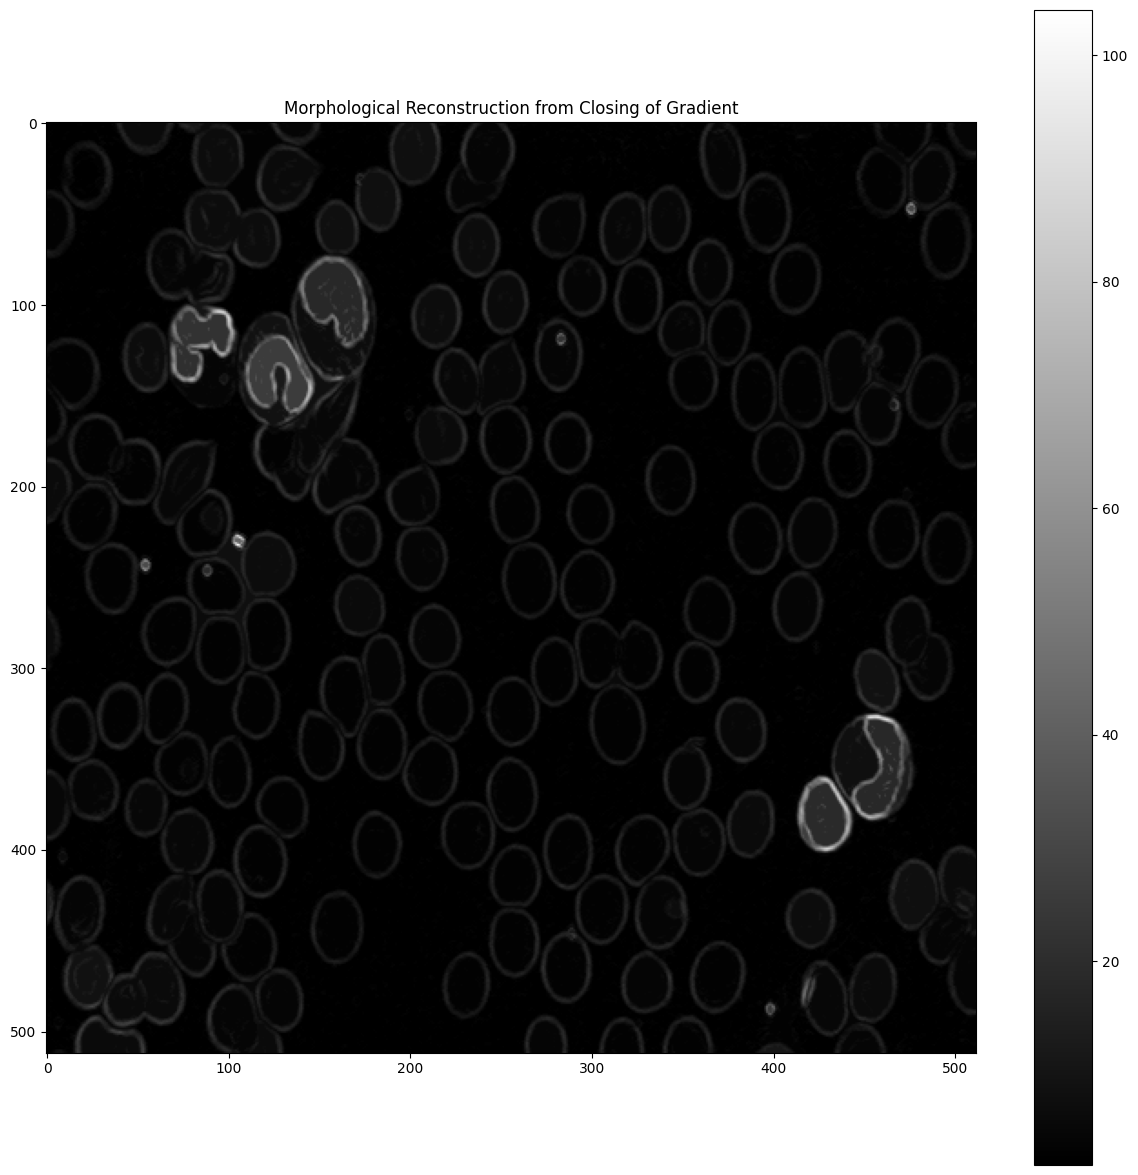

In [ ]:
# Perform a closing on the gradient image with a disk structuring element of radius 5
structuring_element = morpho.disk(5)
imClos = morpho.closing(morpho_grad, structuring_element)

# Perform morphological reconstruction from the closed image
reco = morpho.reconstruction(imClos, morpho_grad, method='erosion')

# Display the reconstructed image
plt.figure(figsize=(15, 15))
plt.imshow(reco, cmap="gray")
plt.title("Morphological Reconstruction from Closing of Gradient")
plt.colorbar()
plt.show()

**Q** : This last part is less guided. Use the reconstruction operation and the above questions to find good markers for the watershed algorithm. You could benefit from using the peak_local_max function of skimage.feature

Shapes -> distance: (512, 512) , markers: (512, 512) , mask: (512, 512)


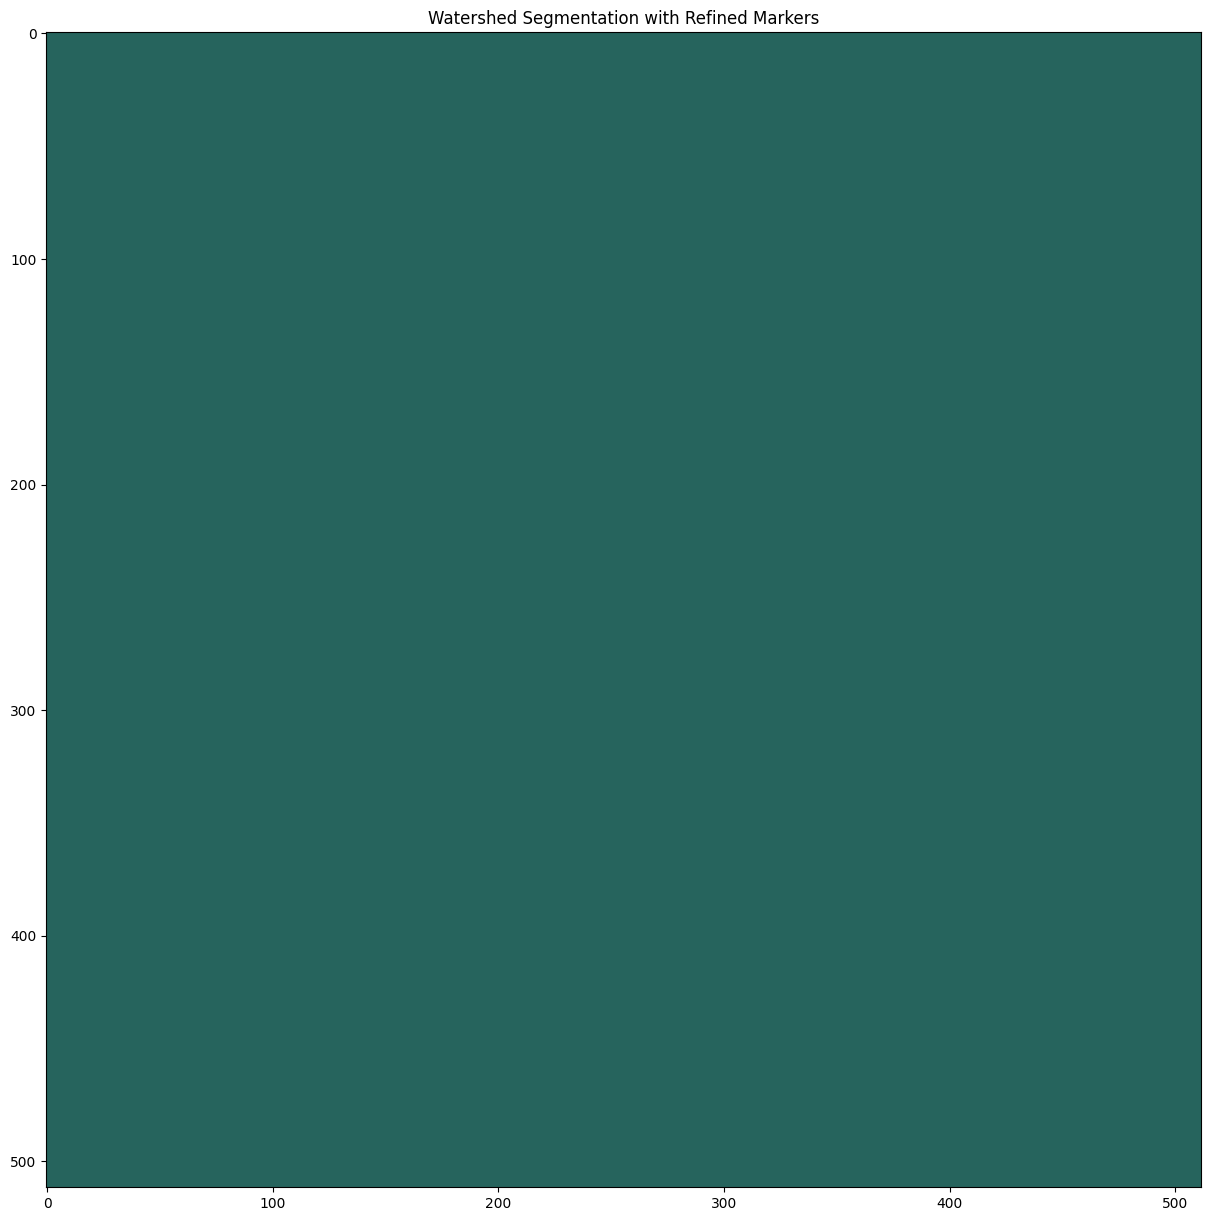

In [39]:
from skimage import morphology as morpho
from skimage import measure
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import distance_transform_edt
import matplotlib

# Define a random colormap for visualization
cmaprand = matplotlib.colors.ListedColormap(np.random.rand(256, 3))

# Step-by-step process to find good markers for the watershed algorithm
if student:
    # Step 1: Apply a closing on the gradient image to smooth the boundaries
    structuring_element = morpho.disk(5)
    closed_grad = morpho.closing(morpho_grad, structuring_element)

    # Step 2: Perform morphological reconstruction on the closed image to enhance structures
    reconstructed_grad = morpho.reconstruction(closed_grad, morpho_grad, method='erosion')

    # Step 3: Compute the distance transform on the reconstructed gradient
    distance = distance_transform_edt(reconstructed_grad)

    # Step 4: Create markers by thresholding the distance map
    markers = measure.label(distance > 5)  # Adjust threshold as needed to control marker placement

    # Step 5: Convert `reconstructed_grad` to a binary mask for watershed
    mask = reconstructed_grad > 0

    # Verify the shapes of all inputs to ensure they match
    print("Shapes -> distance:", distance.shape, ", markers:", markers.shape, ", mask:", mask.shape)

    # Apply the watershed algorithm using the markers and the binary mask
    wat = seg.watershed(-distance, markers, mask=mask)

    # Display the watershed segmentation result
    plt.figure(figsize=(15, 15))
    plt.imshow(wat, cmap=cmaprand)
    plt.title("Watershed Segmentation with Refined Markers")
    plt.show()
